In [8]:
import tensorflow as tf
from keras import Sequential
from keras.datasets import mnist
import numpy as np
from keras.layers import Dense
from keras.utils import to_categorical

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `1.15`. This will be interpreted as: `1.x`.


TensorFlow is already loaded. Please restart the runtime to change versions.


In [0]:
(train_images,train_labels),(test_images, test_labels) = mnist.load_data()

In [10]:
print(train_images.shape[1:])

(28, 28)


###Processing the given data.

####First, converting each image of shape 28x28 to 784 dimension which feeds to the network as a single feature.

In [11]:
dimData = np.prod(train_images.shape[1:])
print(dimData)
train_data = train_images.reshape(train_images.shape[0],dimData)
test_data = test_images.reshape(test_images.shape[0],dimData)

784


####Converting data to float and scaling values between 0 and 1

In [0]:
train_data = train_data.astype('float')
test_data = test_data.astype('float')
train_datad = train_data.astype('float')
test_datad = test_data.astype('float')

####Scaling the data.

In [0]:
train_data /=255.0
test_data /=255.0

####changing the labels from Integer to one-hot encoding. 
[to_categorical is doing the same thing as LabelEncoder().]

In [0]:
train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)

####Creating the network

In [15]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(dimData,)))
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))

####Compiling the model.

In [16]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [17]:
history = model.fit(train_data, train_labels_one_hot, batch_size=256, epochs=10, verbose=1,
                   validation_data=(test_data, test_labels_one_hot))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 60000 samples, validate on 10000 samples
Epoch 1/10





60000/60000 [==============================] - 10s 158us/step - loss: 0.2739 - acc: 0.9163 - val_loss: 0.1837 - val_acc: 0.9393
Epoch 2/10
60000/60000 [==============================] - 1s 19us/step - loss: 0.0928 - acc: 0.9714 - val_loss: 0.1134 - val_acc: 0.9640
Epoch 3/10
60000/60000 [==============================] - 1s 20us/step - loss: 0.0586 - acc: 0.9813 - val_loss: 0.0911 - val_acc: 0.9713
Epoch 4/10
60000/60000 [==============================] - 1s 19us/step - loss: 0.0404 - acc: 0.9873 - val_loss: 0.0786 - val_acc: 0.9788
Epoch 5/10
60000/60000 [==============================] - 1s 19us/step - loss: 0.0290 - acc: 0.9908 - val_loss: 0.0800 - val_acc: 0.9791
Epoch 6/10
60000/60000 [==============================] - 1s 18us/step - loss: 0.0229 - acc: 0.9926 - val_loss: 0.0871 - val_acc: 0.9767
Epoch 7/10
60000/60000 [

###1.) Plotting the loss and accuracy for both training data and validation data.

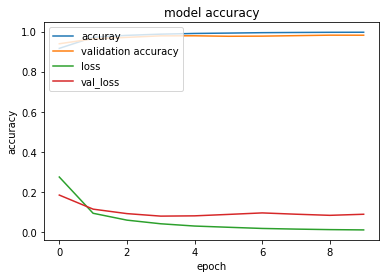

In [19]:

import matplotlib.pyplot as plt
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['accuray', 'validation accuracy','loss','val_loss'], loc='upper left')
plt.show()

###2.) Plotting one of the images in the test data, and then doing inferencing to check what is the prediction of the model on that single image in the test data.

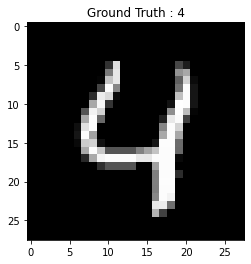

In [23]:
plt.imshow(test_images[4,:,:],cmap='gray')
plt.title('Ground Truth : {}'.format(test_labels[4]))
plt.show()

In [24]:

x=model.predict_classes(test_data[[4],:])
print("Predicted label",test_labels[x])

Predicted label [4]


###3.) We had used 2 hidden layers and relu activation:
####  a. Try to change the number of hidden layer and the activation to tanh or sigmoid and report what happens.

In [25]:
m = Sequential()
m.add(Dense(512, activation='relu', input_shape=(dimData,)))
m.add(Dense(512, activation='relu'))
m.add(Dense(512, activation='tanh'))
m.add(Dense(512, activation='sigmoid'))
m.add(Dense(10, activation='softmax'))
m.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
m.fit(train_data, train_labels_one_hot, batch_size=256, epochs=10, verbose=1,
                   validation_data=(test_data, test_labels_one_hot))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 2s 27us/step - loss: 0.3300 - acc: 0.8956 - val_loss: 0.1040 - val_acc: 0.9674
Epoch 2/10
60000/60000 [==============================] - 1s 22us/step - loss: 0.1017 - acc: 0.9692 - val_loss: 0.1151 - val_acc: 0.9671
Epoch 3/10
60000/60000 [==============================] - 1s 23us/step - loss: 0.0660 - acc: 0.9810 - val_loss: 0.0853 - val_acc: 0.9746
Epoch 4/10
60000/60000 [==============================] - 1s 22us/step - loss: 0.0493 - acc: 0.9850 - val_loss: 0.0909 - val_acc: 0.9745
Epoch 5/10
60000/60000 [==============================] - 1s 22us/step - loss: 0.0347 - acc: 0.9890 - val_loss: 0.0920 - val_acc: 0.9765
Epoch 6/10
60000/60000 [==============================] - 1s 23us/step - loss: 0.0293 - acc: 0.9915 - val_loss: 0.0862 - val_acc: 0.9777
Epoch 7/10
60000/60000 [==============================] - 1s 22us/step - loss: 0.0241 - acc: 0.9926 - val_loss: 0.0851 - val_acc

###4.) Run the same code (3rd question) without scaling the images, how the accuracy changes?

In [26]:

p = Sequential()
p.add(Dense(512, activation='relu', input_shape=(dimData,)))
p.add(Dense(512, activation='relu'))
p.add(Dense(10, activation='softmax'))
p.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
p.fit(train_datad, train_labels_one_hot, batch_size=256, epochs=10, verbose=1,
                   validation_data=(test_datad, test_labels_one_hot)) 

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 1s 25us/step - loss: 10.2762 - acc: 0.3612 - val_loss: 9.5022 - val_acc: 0.4098
Epoch 2/10
60000/60000 [==============================] - 1s 20us/step - loss: 9.0929 - acc: 0.4353 - val_loss: 8.7985 - val_acc: 0.4539
Epoch 3/10
60000/60000 [==============================] - 1s 20us/step - loss: 8.8502 - acc: 0.4506 - val_loss: 8.8716 - val_acc: 0.4493
Epoch 4/10
60000/60000 [==============================] - 1s 20us/step - loss: 8.4630 - acc: 0.4744 - val_loss: 7.4065 - val_acc: 0.5396
Epoch 5/10
60000/60000 [==============================] - 1s 20us/step - loss: 7.4476 - acc: 0.5373 - val_loss: 7.4539 - val_acc: 0.5371
Epoch 6/10
60000/60000 [==============================] - 1s 20us/step - loss: 7.3849 - acc: 0.5414 - val_loss: 7.2366 - val_acc: 0.5507
Epoch 7/10
60000/60000 [==============================] - 1s 20us/step - loss: 7.3714 - acc: 0.5424 - val_loss: 7.2450 - val_ac

##Bonus point:
###5.) Converting the sequential model to an API model.

In [27]:
from keras.models import Model
from keras.layers import Input
i=Input(shape=(784,))
x= Dense(512, activation='relu')(i)
x= Dense(512, activation='relu')(x)

x= Dense(10, activation='softmax')(x)
p = Model(input=i,output=x)
p.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
p.fit(train_data, train_labels_one_hot, batch_size=256, epochs=10, verbose=1,
                   validation_data=(test_data, test_labels_one_hot))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 1s 23us/step - loss: 0.2698 - acc: 0.9168 - val_loss: 0.1323 - val_acc: 0.9555
Epoch 2/10
60000/60000 [==============================] - 1s 20us/step - loss: 0.0932 - acc: 0.9711 - val_loss: 0.0807 - val_acc: 0.9746
Epoch 3/10
60000/60000 [==============================] - 1s 19us/step - loss: 0.0585 - acc: 0.9815 - val_loss: 0.0765 - val_acc: 0.9760
Epoch 4/10
60000/60000 [==============================] - 1s 20us/step - loss: 0.0412 - acc: 0.9867 - val_loss: 0.0633 - val_acc: 0.9802
Epoch 5/10
60000/60000 [==============================] - 1s 19us/step - loss: 0.0288 - acc: 0.9908 - val_loss: 0.0690 - val_acc: 0.9794
Epoch 6/10
60000/60000 [==============================] - 1s 20us/step - loss: 0.0222 - acc: 0.9929 - val_loss: 0.0998 - val_acc: 0.9739
Epoch 7/10
60000/60000 [==============================] - 1s 20us/step - loss: 0.0165 - acc: 0.9950 - val_loss: 0.0687 - val_acc